## Oppgave 6

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.integrate import ode as ode

# klasse som inneholder all informasjon om en punktladning. 
# objektet vet hvordan det regner ut feltet fra seg selv i en gitt koordinat
class Ladning:
    def __init__(self,ladning,posisjon,navn="Q",stille=True): # konstruktør
        self.ladning=ladning
        self.posisjon=posisjon
        self.navn=navn
        self._k_=8.988e9   # konstant 1/4\pi \epsilon_0
        self.stille=stille # objektet dumper informasjon om utregningene
        self.r=0.01 # hvor nært er nært?
    def E_felt(self,koordinat):
        r=np.linalg.norm(self.posisjon-koordinat)       # Avstand mellom kilde og feltpunkt. 
        E=self._k_*self.ladning/r**2                    # Størrelsen på det elektriske feltet. 
        rhat=(koordinat-self.posisjon)/r                # Enhetsvektoren langs \vec{r}
        felt=E*rhat                                     # Det elektriske feltet gitt 
        if self.stille==False:
            print('Beregning av elektrisk felt fra ladning '+self.navn)
            print('----------------------------------------')
            print(f'Avstand fra ladning til feltpunkt r={r:5.3f}')        
            print(f'Størrelsen på det elektriske feltet E={E:5.3e}')
            print(f'Enhetsvektoren fra kilde til feltpunkt rhat=[{rhat[0]:5.3f},{rhat[1]:5.3f},{rhat[2]:5.3f}]')
            print(f'E=[{felt[0]:5.3e},{felt[1]:5.3e},{felt[2]:5.3e}]')
        return felt
    def potensial(self,koordinat): # det elektriske potensialet i en gitt koordinat!
        r=np.linalg.norm(self.posisjon-koordinat)
        v=self._k_*self.ladning/r
        if self.stille==False:
            print('Beregning av elektrisk potensial fra ladning '+self.navn)
            print(f'V={v:5.3e} Volt')
        return v

#  Objekt som holder på en samling av punktldaninger
class Ladninger():
    def __init__(self):
        self.ladninger=[] # Liste med ladninger
        
    def legg_til(self,ladning,stille=True):
        ladning.stille=stille # sørger for at alle nå er stille i samlingen 
        self.ladninger.append(ladning) #legger ladningen inn i lista
    # Regner ut det totalet feltet fra alle ladningene
    def E_felt(self,p):
        E=np.array([0,0,0])
        for L in self.ladninger:
            E=E+L.E_felt(p)
        return E
    def V(self,p):
        V=0
        for L in self.ladninger:
            V=V+L.potensial(p)
        return V

In [24]:
# Bruker objektet Ladning tre ganger
Q1=Ladning(2.0e-6,np.array([0,0.3,0]),"Q1",stille=False)        
Q2=Ladning(2.0e-6,np.array([0,-0.3,0]),"Q2",stille=False)        
Q3=Ladning(4.0e-6,np.array([0.4,0,0]),"Q3",stille=False)        
# Ønsker å finne feltet der Q3 ligger
p3=Q3.posisjon
E1=Q1.E_felt(p3)  # felt fra ladning Q1

Beregning av elektrisk felt fra ladning Q1
----------------------------------------
Avstand fra ladning til feltpunkt r=0.500
Størrelsen på det elektriske feltet E=7.190e+04
Enhetsvektoren fra kilde til feltpunkt rhat=[0.800,-0.600,0.000]
E=[5.752e+04,-4.314e+04,0.000e+00]


In [25]:
E2=Q2.E_felt(p3)

Beregning av elektrisk felt fra ladning Q2
----------------------------------------
Avstand fra ladning til feltpunkt r=0.500
Størrelsen på det elektriske feltet E=7.190e+04
Enhetsvektoren fra kilde til feltpunkt rhat=[0.800,0.600,0.000]
E=[5.752e+04,4.314e+04,0.000e+00]


In [26]:
ET=E1+E2
print(f'E=[{ET[0]:5.3e},{ET[1]:5.3e},{ET[2]:5.3e}]')

E=[1.150e+05,0.000e+00,0.000e+00]


In [27]:
F=Q3.ladning*ET
print(f'Krafen på Q3, F=[{F[0]:5.3e},{F[1]:5.3e},{F[2]:5.3e}] N' )

Krafen på Q3, F=[4.602e-01,0.000e+00,0.000e+00] N


In [28]:
# Vi kan regne ut bidrag fra hver av ladningene
F_1=Q1.E_felt(p3)*Q3.ladning
F_2=Q2.E_felt(p3)*Q3.ladning
print(f'F_1=[{F_1[0]:5.3e},{F_1[1]:5.3e},{F_1[2]:5.3e}] N' )
print(f'F_2=[{F_2[0]:5.3e},{F_2[1]:5.3e},{F_2[2]:5.3e}] N' )

Beregning av elektrisk felt fra ladning Q1
----------------------------------------
Avstand fra ladning til feltpunkt r=0.500
Størrelsen på det elektriske feltet E=7.190e+04
Enhetsvektoren fra kilde til feltpunkt rhat=[0.800,-0.600,0.000]
E=[5.752e+04,-4.314e+04,0.000e+00]
Beregning av elektrisk felt fra ladning Q2
----------------------------------------
Avstand fra ladning til feltpunkt r=0.500
Størrelsen på det elektriske feltet E=7.190e+04
Enhetsvektoren fra kilde til feltpunkt rhat=[0.800,0.600,0.000]
E=[5.752e+04,4.314e+04,0.000e+00]
F_1=[2.301e-01,-1.726e-01,0.000e+00] N
F_2=[2.301e-01,1.726e-01,0.000e+00] N


Text(0, 0.5, 'y')

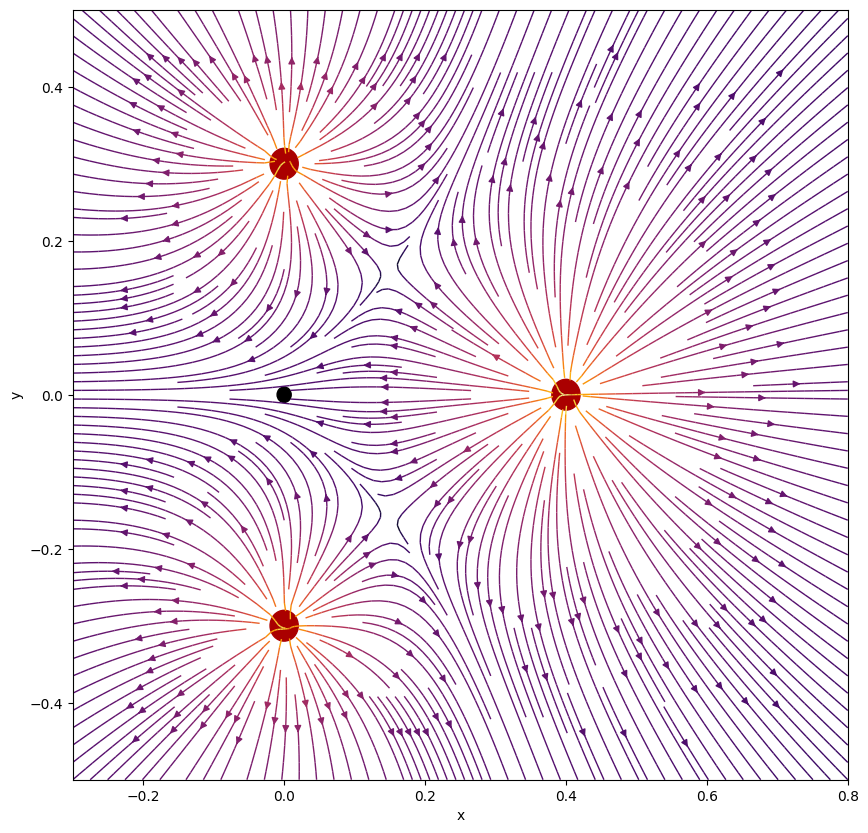

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Grid med x, y punkter
nx, ny = 64, 64
x = np.linspace(-0.3, 0.8, nx)
y = np.linspace(-0.5, 0.5, ny)
X, Y = np.meshgrid(x, y)

Q1=Ladning(2e-6,np.array([0,0.3,0]),"Q1",stille=True)
Q2=Ladning(4e-6,np.array([0.4,0,0]),"Q2",stille=True)
Q3=Ladning(2e-6,np.array([0,-0.3,0]),"Q3",stille=True)

samling=Ladninger()
samling.legg_til(Q1)
samling.legg_til(Q2)
samling.legg_til(Q3)

Ex=np.zeros_like(X)
Ey=np.zeros_like(X)
i=0
for i in range(nx):
    for j in range(ny):    
        p=np.array([X[i][j],Y[i][j],0]) # koordinat til hvert feltpunkt.
        E=samling.E_felt(p)# felt i punktet
        Ex[i][j]=E[0]
        Ey[i][j]=E[1]
    
# Sørger for en stor lesbar figur.
fig=plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

# Plotter streamlines med farger og
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,density=3)
# plotter vektorfelt
#plt.quiver(X, Y, Ex, Ey, pivot='middle', headwidth=4, headlength=6)  
ax.add_artist(Circle(Q1.posisjon, 0.02, color='#aa0000')) #Markering av ladning Q1
ax.add_artist(Circle(Q2.posisjon, 0.02, color='#aa0000')) #Markering av ladning Q2
ax.add_artist(Circle(Q3.posisjon, 0.02, color='#aa0000')) #Markering av ladning Q3
ax.add_artist(Circle(np.array([0,0,0]), 0.01, color='#000000')) #Svart prikk i punktet vi ser på 
plt.xlabel('x')
plt.ylabel('y')

### Oppgave 1

In [30]:
#Hjelpefunksjon for å elektrisk felt i x-retning langs x-aksen 
def hjelper(x):
    Q1=Ladning(4e-6,np.array([0,0,0]),"Q1",stille=True)
    Q2=Ladning(1e-6,np.array([0.1,0,0]),"Q2",stille=True)
    p=np.array([x,0,0])
    E=Q1.E_felt(p)+Q2.E_felt(p)
    return E[0] # returnerer bare x-komponent av feltet. Y kansellerer. 

In [31]:
#from scipy.optimize import fsolve
#losning = fsolve(hjelper, 0.05) # start å lete etter nullpunkt i x=0.5
#print(losning)

#### Lag en figur som viser det elektriske feltet rundt punktladningene.

Text(0, 0.5, 'y')

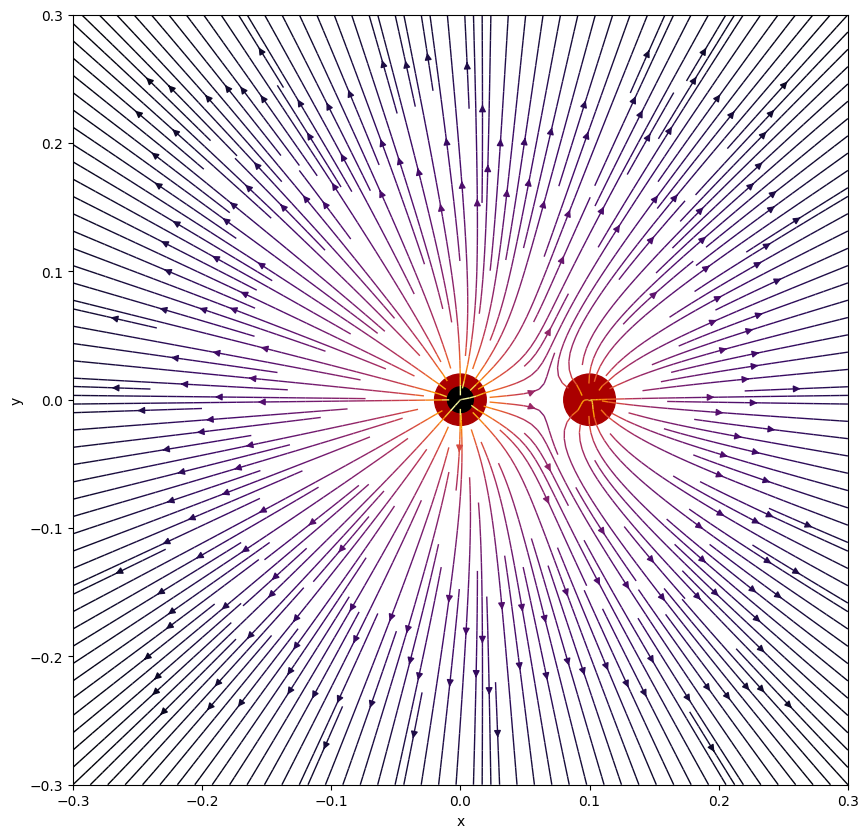

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

# Grid med x, y punkter i området vi ønsker å se på feltet
nx, ny = 64, 64
x = np.linspace(-0.3, 0.3, nx)
y = np.linspace(-0.3, 0.3, ny)
X, Y = np.meshgrid(x, y)

Q1=Ladning(4e-6,np.array([0,0,0]),"Q1",stille=True)
Q2=Ladning(1e-6,np.array([0.1,0,0]),"Q2",stille=True)

samling=Ladninger()
samling.legg_til(Q1)
samling.legg_til(Q2)

Ex=np.zeros_like(X)
Ey=np.zeros_like(X)
i=0
for i in range(nx):
    for j in range(ny):    
        p=np.array([X[i][j],Y[i][j],0]) # koordinat til hvert feltpunkt.
        E=samling.E_felt(p)# felt i punktet
        Ex[i][j]=E[0]
        Ey[i][j]=E[1]
    
# Sørger for en stor lesbar figur.
fig=plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

# Plotter streamlines med farger og
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,density=3)
# plotter vektorfelt
#plt.quiver(X, Y, Ex, Ey, pivot='middle', headwidth=4, headlength=6)  
ax.add_artist(Circle(Q1.posisjon, 0.02, color='#aa0000')) #Markering av ladning Q1
ax.add_artist(Circle(Q2.posisjon, 0.02, color='#aa0000')) #Markering av ladning Q2
ax.add_artist(Circle(np.array([0,0,0]), 0.01, color='#000000')) #Svart prikk i punktet vi ser på 
plt.xlabel('x')
plt.ylabel('y')

#### Regn ut verdier elektriske potensialet for punkter langs x-aksen for x mellom -0.1 til 0.2 med steg på 0.001 i området mellom ladningene. Hvorfor er ikke potensialet mellom de to ladningene null noen steder?

(0.0, 8000000.0)

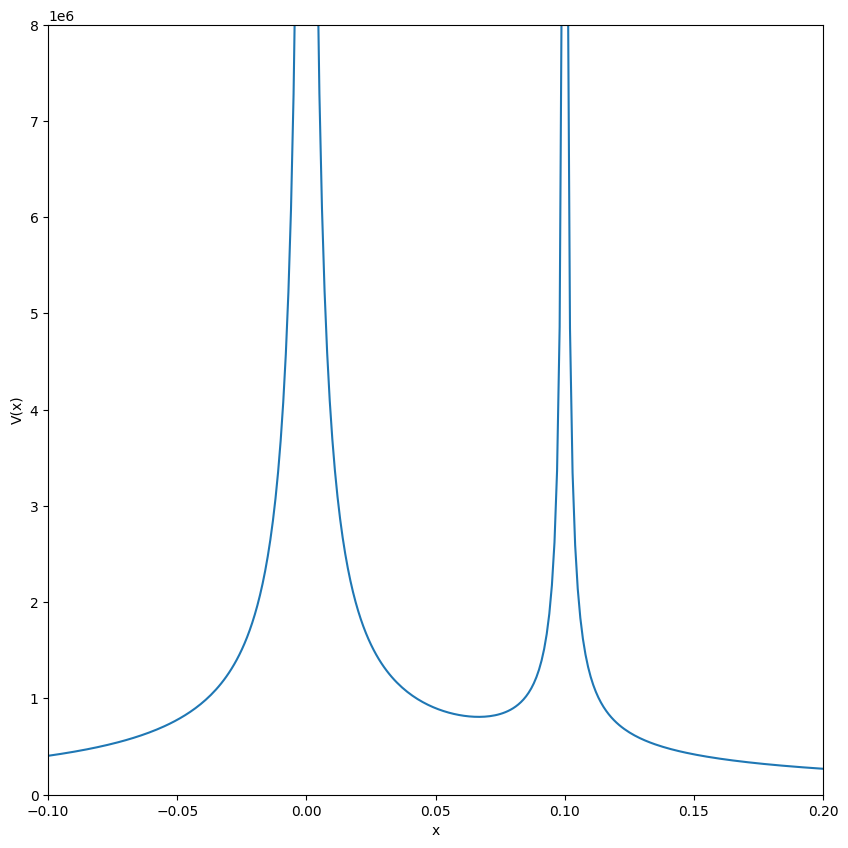

In [33]:
Q1=Ladning(4e-6,np.array([0,0,0]),"Q1",stille=True)
Q2=Ladning(1e-6,np.array([0.1,0,0]),"Q2",stille=True)
samling=Ladninger()
samling.legg_til(Q1)
samling.legg_til(Q2)

v=[]
xs=[]
for x in np.arange(-0.1,0.2,0.001):
    p=np.array([x,0,0])
    v.append(samling.V(p))
    xs.append(x)

fig=plt.figure(figsize = (10, 10))
plt.plot(xs,v)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.xlim([-0.1,0.2])
plt.ylim([0,0.8e7])

##### Det elektriske potensialet mellom de to ladningen V_tot = V_q1 + Vq2. For hver av ladningene er = kQ/r og aldri 0, samt at begge ladningene er postive - vi summerer altså sammen to postive tall som ikke er null, altså vil V_tot aldri være null. 

### Hva er det elektriske potensialet i punktet du fant i oppgave 1? Er dette logisk?

#### Jeg klarer ikke skjønne hva denne oppgaven ber om - jeg har funnet potensialet for punktet mellom x = -0.1 og x = 0.2, og synes plotet virker logisk.